## Importing necessary libraries

In [1]:
import pandas as pd
from IPython.display import Image
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import plotly.io as pio
from collections import defaultdict
import collections
import os
import psutil
import warnings
warnings.filterwarnings('ignore')

## Reading the datasets

In [2]:
deliveries = pd.read_csv(r'deliveries.csv')
matches = pd.read_csv(r'matches.csv')

# Pre-processing the given dataset

In [3]:
### The given dataset has mistaken two names for the same team 'Rising Pune Supergiants'
deliveries = deliveries.replace(to_replace="Rising Pune Supergiant", value="Rising Pune Supergiants") 
matches = matches.replace(to_replace="Rising Pune Supergiant", value="Rising Pune Supergiants") 

### 'Delhi Daredevils' later changed their name to 'Delhi Capitals'
deliveries = deliveries.replace(to_replace="Delhi Daredevils", value ="Delhi Capitals") 
matches = matches.replace(to_replace="Delhi Daredevils", value="Delhi Capitals") 

### 'Deccan Chargers' announced a sale of their team and got a new name as 'Sunrisers Hyderabad'
deliveries = deliveries.replace(to_replace="Deccan Chargers", value="Sunrisers Hyderabad")
matches = matches.replace(to_replace="Deccan Chargers", value="Sunrisers Hyderabad")


#Filling Null values in winner column
matches['winner'] = matches['winner'].fillna("No Result")

#Merging similar name of stadiums into one
matches = matches.replace(to_replace="MA Chidambaram Stadium, Chepauk", value="M. A. Chidambaram Stadium") 
matches = matches.replace(to_replace="Punjab Cricket Association IS Bindra Stadium, Mohali", value="Punjab Cricket Association Stadium, Mohali") 
matches = matches.replace(to_replace="M. Chinnaswamy Stadium", value="M Chinnaswamy Stadium") 
matches = matches.replace(to_replace="ACA-VDCA Stadium", value="Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium") 
matches = matches.replace(to_replace="Rajiv Gandhi International Stadium, Uppal", value="Rajiv Gandhi Intl. Cricket Stadium") 

In [4]:
deliveries['bowling_team'].unique()

array(['Royal Challengers Bangalore', 'Sunrisers Hyderabad',
       'Rising Pune Supergiants', 'Mumbai Indians',
       'Kolkata Knight Riders', 'Gujarat Lions', 'Kings XI Punjab',
       'Delhi Capitals', 'Chennai Super Kings', 'Rajasthan Royals',
       'Kochi Tuskers Kerala', 'Pune Warriors'], dtype=object)

In [5]:
Teams={'Royal Challengers Bangalore':'RCB', 'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS', 'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 'Gujarat Lions':'GL', 'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD', 'Chennai Super Kings':'CSK', 'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC', 'Kochi Tuskers Kerala':'KTK', 'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS' 
}

deliveries['batting_team']=deliveries['batting_team'].map(Teams)
deliveries['bowling_team']=deliveries['bowling_team'].map(Teams)

In [6]:
deliveries

match_id  inning batting_team bowling_team  over  ball    batsman  \
0              1       1          SRH          RCB     1     1  DA Warner   
1              1       1          SRH          RCB     1     2  DA Warner   
2              1       1          SRH          RCB     1     3  DA Warner   
3              1       1          SRH          RCB     1     4  DA Warner   
4              1       1          SRH          RCB     1     5  DA Warner   
...          ...     ...          ...          ...   ...   ...        ...   
179073     11415       2          CSK           MI    20     2  RA Jadeja   
179074     11415       2          CSK           MI    20     3  SR Watson   
179075     11415       2          CSK           MI    20     4  SR Watson   
179076     11415       2          CSK           MI    20     5  SN Thakur   
179077     11415       2          CSK           MI    20     6  SN Thakur   

       non_striker      bowler  is_super_over  ...  bye_runs  legbye_runs  \
0         S Dhawan    TS Mills              0  ...         0            0   
1         S Dhawan    TS Mills              0  ...         0            0   
2         S Dhawan    TS Mills              0  ...         0            0   
3         S Dhawan    TS Mills              0  ...         0            0   
4         S Dhawan    TS Mills              0  ...         0            0   
...            ...         ...            ...  ...       ...          ...   
179073   SR Watson  SL Malinga              0  ...         0            0   
179074   RA Jadeja  SL Malinga              0  ...         0            0   
179075   RA Jadeja  SL Malinga              0  ...         0            0   
179076   RA Jadeja  SL Malinga              0  ...         0            0   
179077   RA Jadeja  SL Malinga              0  ...         0            0   

        noball_runs  penalty_runs  batsman_runs  extra_runs  total_runs  \
0                 0             0             0           0           0   
1                 0             0             0           0           0   
2                 0             0             4           0           4   
3                 0             0             0           0           0   
4                 0             0             0           2           2   
...             ...           ...           ...         ...         ...   
179073            0             0             1           0           1   
179074            0             0             2           0           2   
179075            0             0             1           0           1   
179076            0             0             2           0           2   
179077            0             0             0           0           0   

        player_dismissed dismissal_kind    fielder  
0                    NaN            NaN        NaN  
1                    NaN            NaN        NaN  
2                    NaN            NaN        NaN  
3                    NaN            NaN        NaN  
4                    NaN            NaN        NaN  
...                  ...            ...        ...  
179073               NaN            NaN        NaN  
179074               NaN            NaN        NaN  
179075         SR Watson        run out  KH Pandya  
179076               NaN            NaN        NaN  
179077         SN Thakur            lbw        NaN  

[179078 rows x 21 columns]

# Analysing the most successful team

In [7]:
# ASKING USER WHETHER TO SAVE THE PLOT ON THE DISK OR NOT 

if (input("Save/download plots? y/n: ").lower()[0] == 'y'):
  save_files = True
  print("\nPlots will be saved/downloaded.")
else:
  save_files = False
  print("Plots will not be saved/downloaded.")

Save/download plots? y/n: n
Plots will not be saved/downloaded.


In [8]:
matches['winner'].value_counts()

Mumbai Indians                 109
Chennai Super Kings            100
Kolkata Knight Riders           92
Sunrisers Hyderabad             87
Royal Challengers Bangalore     84
Kings XI Punjab                 82
Delhi Capitals                  77
Rajasthan Royals                75
Rising Pune Supergiants         15
Gujarat Lions                   13
Pune Warriors                   12
Kochi Tuskers Kerala             6
No Result                        4
Name: winner, dtype: int64

### Teams to have played and won most finals

In [9]:
finals = matches.drop_duplicates(subset=['season'], keep='last')
finals = finals[['id', 'season', 'city', 'team1', 'team2', 'toss_winner', 'toss_decision', 'winner']]

most_finals = pd.concat([finals['team1'], finals['team2']]).value_counts().reset_index()
most_finals.rename({'index':'team',0:'count'}, axis=1, inplace=True)
wins = finals['winner'].value_counts().reset_index()
most_finals=most_finals.merge(wins,left_on='team',right_on='index',how='outer')
most_finals=most_finals.replace(np.NaN,0)
most_finals.drop('index',axis=1,inplace=True)
#most_finals.set_index('team',inplace=True)
most_finals.rename({'count':'finals_played','winner':'won_count'},inplace=True,axis=1)

most_finals

team  finals_played  won_count
0          Chennai Super Kings              8        3.0
1               Mumbai Indians              5        4.0
2          Sunrisers Hyderabad              3        2.0
3  Royal Challengers Bangalore              3        0.0
4        Kolkata Knight Riders              2        2.0
5              Kings XI Punjab              1        0.0
6             Rajasthan Royals              1        1.0
7      Rising Pune Supergiants              1        0.0

In [10]:
traceA=go.Bar(x=most_finals['team'], y=most_finals['finals_played'], name='Total Matches')
traceB=go.Bar(x=most_finals['team'], y=most_finals['won_count'], name='Matches wins')

bars = [traceA,traceB]
py.iplot(bars)

### The below function is generating a file, but the file doesn't contains any graph.
### Please select camera button on the plot to download it locally.
# save file

#if save_files:
#  if not os.path.exists('plots'):
#    os.makedirs('plots')
#  filename = 'plots/team_finals_and_wins'
#  plt.savefig(filename, bbox_inches = 'tight')


### No. of times 200+ scored by a team

In [11]:
scores = deliveries.groupby(['match_id','inning','batting_team','bowling_team'])['total_runs'].sum().reset_index()
scores

match_id  inning batting_team bowling_team  total_runs
0            1       1          SRH          RCB         207
1            1       2          RCB          SRH         172
2            2       1           MI          RPS         184
3            2       2          RPS           MI         187
4            3       1           GL          KKR         183
...        ...     ...          ...          ...         ...
1166     11347       2           MI          KKR         137
1167     11412       1          CSK           MI         136
1168     11412       2           MI          CSK         140
1169     11415       1           MI          CSK         152
1170     11415       2          CSK           MI         157

[1171 rows x 5 columns]

In [12]:
scores_200 = scores[scores['total_runs']>=200]
scores_200

match_id  inning batting_team bowling_team  total_runs
0            1       1          SRH          RCB         207
30          20       1          RCB           GL         213
48          32       1          SRH         KXIP         207
56          36       1          SRH          KKR         209
76          50       1         KXIP           MI         230
...        ...     ...          ...          ...         ...
1132     11326       2          KKR          RCB         219
1141     11333       1          RCB         KXIP         213
1149     11338       1          KKR           MI         241
1150     11338       2           MI          KKR         204
1151     11339       1          SRH         KXIP         232

[85 rows x 5 columns]

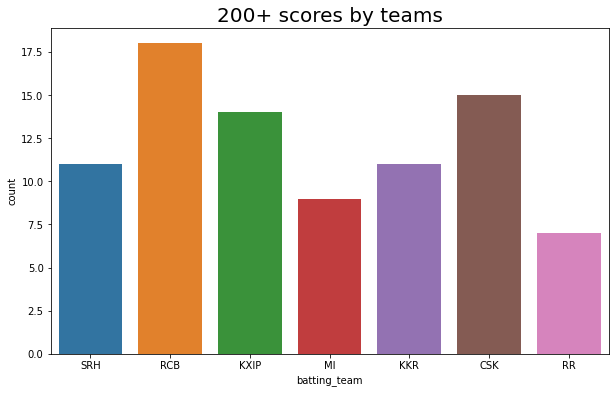

In [13]:
fig = plt.figure(figsize = (10, 6))
plt.title("200+ scores by teams", fontsize=20)
sns.countplot(x='batting_team', data=scores_200)

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/teams_200s'
  plt.savefig(filename, bbox_inches = 'tight')

### Maximum score in each season

In [14]:
matches_list = []
total_innings = []
batting_team = []
runs = []

for match_no in deliveries['match_id'].unique():
    for innings in deliveries[ deliveries['match_id']==match_no ]['inning'].unique():
        df = deliveries[
                        (deliveries['match_id']==match_no) &
                        (deliveries['inning']==innings)
        ]
        total_runs = df['total_runs'].sum()
        runs.append(total_runs)
        matches_list.append(match_no)
        total_innings.append(innings)
        batting_team.append(df['batting_team'].unique()[0])

In [15]:
df1 = pd.DataFrame()
df1['match_id'] = matches_list
df1['total_runs'] = runs
df1['season'] = [matches[matches['id']==i]['season'].unique()[0] for i in matches_list] 
df1['batting_team'] = batting_team

df1

match_id  total_runs  season batting_team
0            1         207    2017          SRH
1            1         172    2017          RCB
2            2         184    2017           MI
3            2         187    2017          RPS
4            3         183    2017           GL
...        ...         ...     ...          ...
1523     11413         170    2019          NaN
1524     11414         155    2019          NaN
1525     11414         162    2019          CSK
1526     11415         152    2019           MI
1527     11415         157    2019          CSK

[1528 rows x 4 columns]

In [16]:
season = []
teamId = []
max_runs = []
for year in df1['season'].unique():
    maximum_run = df1[ df1['season']==year ]['total_runs'].max()
    team = df1[ (df1['season']==year) & (df1['total_runs']==maximum_run) ]['batting_team'].unique()[0]
    season.append(year)
    teamId.append(team)
    max_runs.append(maximum_run)

max_runs

[230, 240, 211, 246, 232, 222, 263, 231, 235, 248, 250, 241]

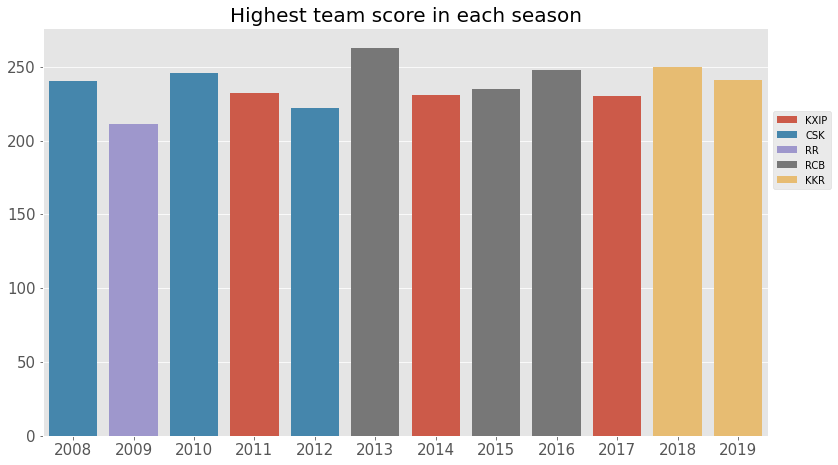

In [17]:
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(13,7.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Highest team score in each season",fontsize=20)
ax=sns.barplot(x = season, y = max_runs, hue = teamId, dodge=False)
ax.legend(loc = 'center left', bbox_to_anchor=(1,0.7))

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/teams_200s'
  plt.savefig(filename, bbox_inches = 'tight')

### Win percentage of IPL teams

In [18]:
matches_copy = pd.DataFrame
matches_copy = matches.copy(deep=True)

matches_copy['team1']=matches_copy['team1'].map(Teams)
matches_copy['team2']=matches_copy['team2'].map(Teams)

In [19]:
teams=(matches_copy['team1'].value_counts()+matches_copy['team2'].value_counts()).reset_index()
teams.columns=['team_name','Matches_played']
teams

team_name  Matches_played
0        CSK             164
1         GL              30
2        KKR             178
3        KTK              14
4       KXIP             176
5         MI             187
6         PW              46
7        RCB             180
8        RPS              30
9         RR             147
10       SRH             183

In [20]:
matches_copy['winner']=matches_copy['winner'].map(Teams)

In [21]:
wins=matches_copy['winner'].value_counts().reset_index()
wins.columns=['team_name','wins']
wins

team_name  wins
0         MI   109
1        CSK   100
2        KKR    92
3        SRH    87
4        RCB    84
5       KXIP    82
6         RR    75
7        RPS    15
8         GL    13
9         PW    12
10       KTK     6

In [22]:
player=teams.merge(wins,left_on='team_name',right_on='team_name',how='inner')
player['%win']=(player['wins']/player['Matches_played'])*100
player = player.sort_values('%win', ascending=False)
player

team_name  Matches_played  wins       %win
0        CSK             164   100  60.975610
5         MI             187   109  58.288770
2        KKR             178    92  51.685393
9         RR             147    75  51.020408
8        RPS              30    15  50.000000
10       SRH             183    87  47.540984
7        RCB             180    84  46.666667
4       KXIP             176    82  46.590909
1         GL              30    13  43.333333
3        KTK              14     6  42.857143
6         PW              46    12  26.086957

In [23]:
trace1=go.Bar(x=player['team_name'], y=player['Matches_played'], name='Total Matches')
trace2=go.Bar(x=player['team_name'], y=player['wins'], name='Matches wins')

In [24]:
matches_data=[trace1,trace2]
fig = py.iplot(matches_data)
#fig.write_image("yourfile.png") 

##img = pio.to_image(fig, format='png')
#Image(img)
#py.offline.plot(fig, filename="plots/teams_games_and_winsTEST.png")
### The below function is generating a file, but the file doesn't contains any graph.
### Please select camera button on the plot to download it locally.

"""# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/teams_games_and_wins'
  plt.savefig(filename, bbox_inches = 'tight')"""

"# save file\nif save_files:\n  if not os.path.exists('plots'):\n    os.makedirs('plots')\n  filename = 'plots/teams_games_and_wins'\n  plt.savefig(filename, bbox_inches = 'tight')"

#### Since it is clearly visible that MI and CSK have been the two most successful teams (acc. to win %age and finals played and won) lets now perform a their head-to-head analysis

# CSKvsMI

In [25]:
def team1_vs_team2(team1,team2):
    mt1=matches[((matches['team1']==team1)|(matches['team2']==team1))&((matches['team1']==team2)|(matches['team2']==team2))]
    plt.style.use('ggplot')
    fig=plt.gcf()
    fig.set_size_inches(13,7.5)
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)
    plt.title("ONE ON ONE CLASH",fontsize=20)
    ax=sns.countplot(x = 'season', hue='winner',data=mt1, palette='YlGnBu')
    ax.legend(loc = 'center left', bbox_to_anchor=(1,0.7))

    # save file
    if save_files:
      if not os.path.exists('plots'):
        os.makedirs('plots')
      filename = 'plots/CSKvsMI_EverySeason'
      plt.savefig(filename, bbox_inches = 'tight')

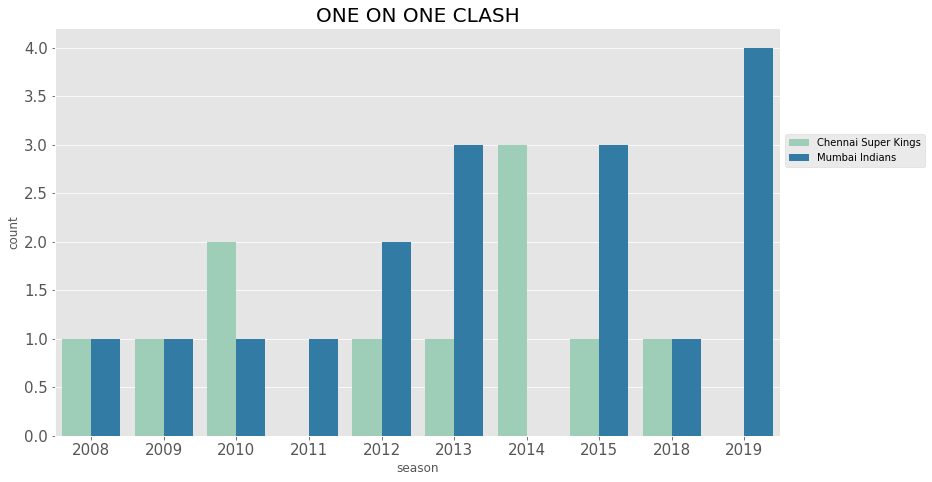

In [26]:
team1_vs_team2('Chennai Super Kings','Mumbai Indians')

In [27]:
data = matches_copy
micsk=data[np.logical_or(np.logical_and(data['team1']=='MI',data['team2']=='CSK'),np.logical_and(data['team2']=='MI',data['team1']=='CSK'))]

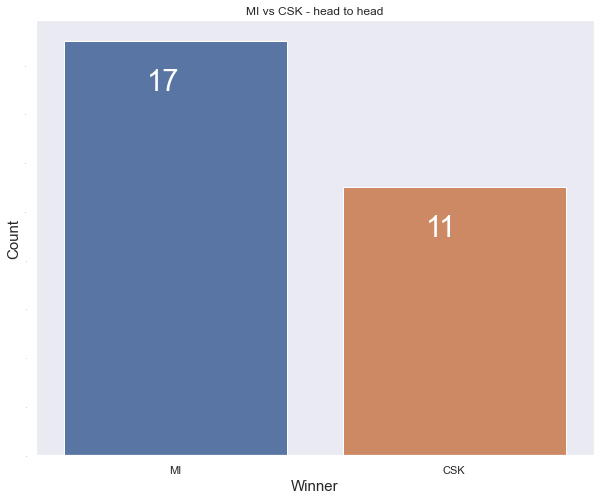

In [28]:
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(micsk['winner'],order=micsk['winner'].value_counts().index)
plt.text(-0.1,15,str(micsk['winner'].value_counts()['MI']),size=29,color='white')
plt.text(0.9,9,str(micsk['winner'].value_counts()['CSK']),size=29,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=0)
plt.title('MI vs CSK - head to head')
plt.show()

# save file
if save_files:
    if not os.path.exists('plots'):
        os.makedirs('plots')
    filename = 'plots/CSKvsMI_HeadToHead'
    fig.savefig(filename, bbox_inches='tight')

# Player analysis

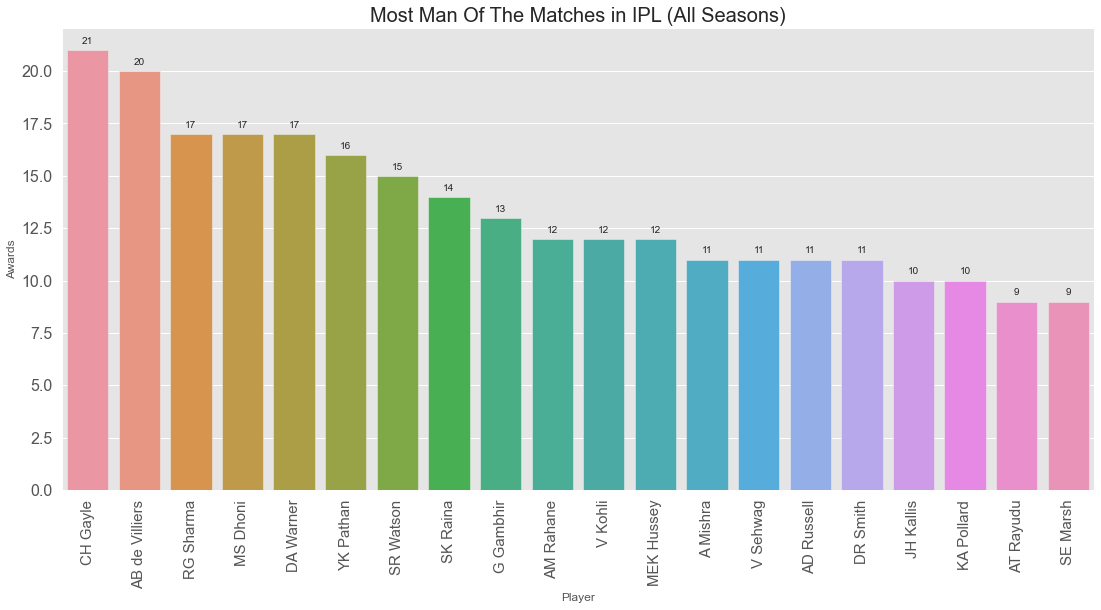

In [29]:
### Players with most Man of the Match awards in IPL
mom = pd.DataFrame()
mom['Awards']=matches['player_of_match'].value_counts()
mom['Player'] =mom.index
mom=mom[:20]
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,8.5)
plt.xticks(rotation=90,fontsize=15)
plt.yticks(fontsize=16)
plt.title("Most Man Of The Matches in IPL (All Seasons)",fontsize=20)
ax=sns.barplot(x='Player',y='Awards', data=mom)
count=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 0.3,mom['Awards'].iloc[count],ha="center") 
    count+=1
    
# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/most_MOM'
  plt.savefig(filename, bbox_inches = 'tight')

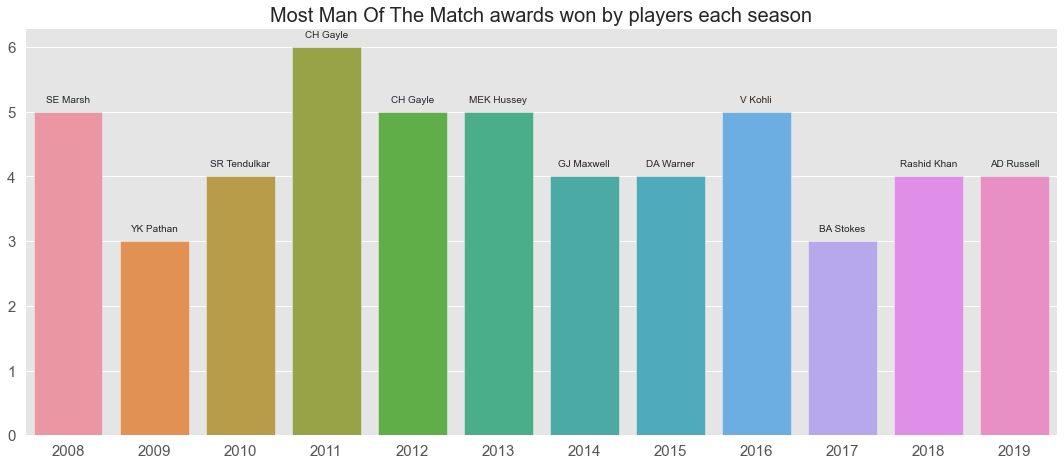

In [30]:

dic=defaultdict(list)
for i in range(0,len(matches)):
    dic[matches.season.iloc[i]].append(matches.player_of_match.iloc[i])
player=[]
match=[]
year=[]
for i in sorted(dic.keys()):
    ctr=collections.Counter(dic[i])
    d={k: v for k, v in sorted(ctr.items(), key=lambda item: item[1],reverse=True)}
    player.append(list(d.keys())[0])
    match.append(list(d.values())[0])
    year.append(i)
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,7.5)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title("Most Man Of The Match awards won by players each season", fontsize=20)
ax=sns.barplot(year, match)
count=0
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 0.15,player[count],ha="center") 
    count+=1
    
# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/most_MOM_EachSeason'
  plt.savefig(filename, bbox_inches = 'tight')

## Batsmen analysis

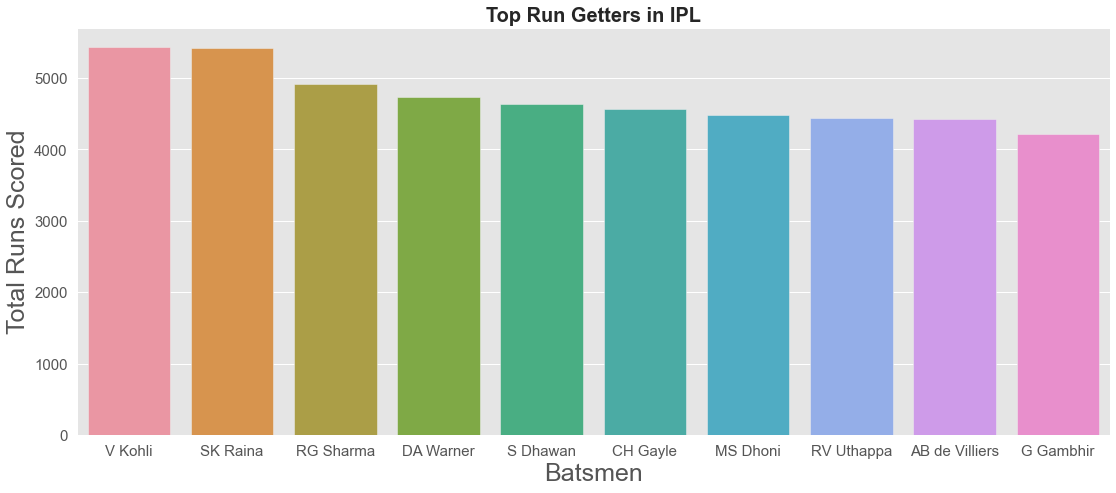

In [31]:
### TOP RUN GETTERS IN IPL HISTORY ###

top_runGetters = pd.DataFrame(deliveries.groupby('batsman')['batsman_runs'].sum().sort_values(ascending=False).head(10))
top_runGetters.reset_index(inplace=True)
top_runGetters.columns=['Batsman', 'Total runs']
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,7.5)

ax=sns.barplot(x='Batsman',y='Total runs', data=top_runGetters)

plt.title("Top Run Getters in IPL", fontsize=20, fontweight = 'bold')
plt.xlabel("Batsmen", size = 25)
plt.ylabel("Total Runs Scored", size=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/TopRunScorers'
  plt.savefig(filename, bbox_inches = 'tight')

In [32]:
#print(type(top_runGetters))
top_runGetters.head()

Batsman  Total runs
0    V Kohli        5434
1   SK Raina        5415
2  RG Sharma        4914
3  DA Warner        4741
4   S Dhawan        4632

In [33]:
balls=deliveries.groupby('batsman')['ball'].count().reset_index()
balls

batsman  ball
0    A Ashish Reddy   196
1        A Chandila     7
2          A Chopra    75
3       A Choudhary    20
4       A Dananjaya     5
..              ...   ...
511     YV Takawale   183
512   Yashpal Singh    67
513     Younis Khan     7
514    Yuvraj Singh  2207
515          Z Khan   141

[516 rows x 2 columns]

In [34]:
runs=deliveries.groupby('batsman')['batsman_runs'].sum().reset_index()
runs

batsman  batsman_runs
0    A Ashish Reddy           280
1        A Chandila             4
2          A Chopra            53
3       A Choudhary            25
4       A Dananjaya             4
..              ...           ...
511     YV Takawale           192
512   Yashpal Singh            47
513     Younis Khan             3
514    Yuvraj Singh          2765
515          Z Khan           117

[516 rows x 2 columns]

In [35]:
### FOURS HIT BY BATSMEN IN IPL SO FAR ###

four=deliveries[deliveries['batsman_runs']==4]
#four
runs_4=four.groupby('batsman')['batsman_runs'].count().reset_index()
runs_4.columns=['batsman','4s']
runs_4

batsman   4s
0    A Ashish Reddy   16
1          A Chopra    7
2       A Choudhary    1
3        A Flintoff    5
4           A Hales   13
..              ...  ...
405       YK Pathan  264
406     YV Takawale   26
407   Yashpal Singh    5
408    Yuvraj Singh  218
409          Z Khan   11

[410 rows x 2 columns]

In [36]:
### SIXES HIT BY BATSMEN IN IPL SO FAR ###

six=deliveries[deliveries['batsman_runs']==6]
#six

runs_6=six.groupby('batsman')['batsman_runs'].count().reset_index()
runs_6.columns=['batsman','6s']
runs_6

batsman   6s
0     A Ashish Reddy   15
1        A Choudhary    1
2         A Flintoff    2
3            A Hales    6
4           A Mishra    5
..               ...  ...
331  Y Venugopal Rao   37
332        YK Pathan  161
333      YV Takawale    3
334     Yuvraj Singh  149
335           Z Khan    2

[336 rows x 2 columns]

In [37]:
player=pd.concat([runs,balls.iloc[:,1],runs_4.iloc[:,1],runs_6.iloc[:,1]],axis=1)
player

player.fillna(0,inplace=True)
player

batsman  batsman_runs  ball    4s    6s
0    A Ashish Reddy           280   196  16.0  15.0
1        A Chandila             4     7   7.0   1.0
2          A Chopra            53    75   1.0   2.0
3       A Choudhary            25    20   5.0   6.0
4       A Dananjaya             4     5  13.0   5.0
..              ...           ...   ...   ...   ...
511     YV Takawale           192   183   0.0   0.0
512   Yashpal Singh            47    67   0.0   0.0
513     Younis Khan             3     7   0.0   0.0
514    Yuvraj Singh          2765  2207   0.0   0.0
515          Z Khan           117   141   0.0   0.0

[516 rows x 5 columns]

In [38]:
player['strike_rate']=(player['batsman_runs']/player['ball'])*100
player

batsman  batsman_runs  ball    4s    6s  strike_rate
0    A Ashish Reddy           280   196  16.0  15.0   142.857143
1        A Chandila             4     7   7.0   1.0    57.142857
2          A Chopra            53    75   1.0   2.0    70.666667
3       A Choudhary            25    20   5.0   6.0   125.000000
4       A Dananjaya             4     5  13.0   5.0    80.000000
..              ...           ...   ...   ...   ...          ...
511     YV Takawale           192   183   0.0   0.0   104.918033
512   Yashpal Singh            47    67   0.0   0.0    70.149254
513     Younis Khan             3     7   0.0   0.0    42.857143
514    Yuvraj Singh          2765  2207   0.0   0.0   125.283190
515          Z Khan           117   141   0.0   0.0    82.978723

[516 rows x 6 columns]

In [39]:
grp=deliveries.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index()
grp

match_id      batsman batting_team  batsman_runs
0            1  A Choudhary          RCB             6
1            1  BCJ Cutting          SRH            16
2            1     CH Gayle          RCB            32
3            1    DA Warner          SRH            14
4            1     DJ Hooda          SRH            16
...        ...          ...          ...           ...
9942     11415    RD Chahar           MI             0
9943     11415    RG Sharma           MI            15
9944     11415     SK Raina          CSK             9
9945     11415    SN Thakur          CSK             2
9946     11415    SR Watson          CSK            84

[9947 rows x 4 columns]

In [40]:
maximum=grp.groupby('batsman')['batsman_runs'].max().reset_index()
maximum.columns=['batsman','max_runs']
maximum

batsman  max_runs
0    A Ashish Reddy        36
1        A Chandila         4
2          A Chopra        24
3       A Choudhary        15
4       A Dananjaya         4
..              ...       ...
478     YV Takawale        45
479   Yashpal Singh        20
480     Younis Khan         3
481    Yuvraj Singh        83
482          Z Khan        23

[483 rows x 2 columns]

In [41]:
player2=pd.concat([player,maximum.iloc[:,1]],axis=1)
player2

player2_df = pd.DataFrame(player2)

player2.fillna(0,inplace=True)
player2

batsman  batsman_runs  ball    4s    6s  strike_rate  max_runs
0    A Ashish Reddy           280   196  16.0  15.0   142.857143      36.0
1        A Chandila             4     7   7.0   1.0    57.142857       4.0
2          A Chopra            53    75   1.0   2.0    70.666667      24.0
3       A Choudhary            25    20   5.0   6.0   125.000000      15.0
4       A Dananjaya             4     5  13.0   5.0    80.000000       4.0
..              ...           ...   ...   ...   ...          ...       ...
511     YV Takawale           192   183   0.0   0.0   104.918033       0.0
512   Yashpal Singh            47    67   0.0   0.0    70.149254       0.0
513     Younis Khan             3     7   0.0   0.0    42.857143       0.0
514    Yuvraj Singh          2765  2207   0.0   0.0   125.283190       0.0
515          Z Khan           117   141   0.0   0.0    82.978723       0.0

[516 rows x 7 columns]

### Highest individual scores in IPL so far

In [42]:
deliveries.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index().sort_values(by='batsman_runs',ascending=False).head(10)

match_id         batsman batting_team  batsman_runs
5464       411        CH Gayle          RCB           175
781         60     BB McCullum          KKR           158
7418       562  AB de Villiers          RCB           133
8169       620  AB de Villiers          RCB           129
4945       372        CH Gayle          RCB           128
2754       206         M Vijay          CSK           127
462         36       DA Warner          SRH           126
6831       516        V Sehwag         KXIP           122
9201      7953       SR Watson          CSK           121
3234       243     PC Valthaty         KXIP           120

### Bowlers Analysis

#### FINDING HIGHEST WICKET TAKES IN IPL SO FAR

In [43]:
deliveries['dismissal_kind'].unique()

array([nan, 'caught', 'bowled', 'run out', 'lbw', 'caught and bowled',
       'stumped', 'retired hurt', 'hit wicket', 'obstructing the field'],
      dtype=object)

In [44]:
dismissal_kinds = ['caught', 'bowled', 'lbw', 'caught and bowled', 'stumped', 'hit wicket']

In [45]:
bowlers = deliveries[deliveries['dismissal_kind'].isin(dismissal_kinds)]
bowlers = deliveries.groupby('bowler').apply(lambda x: x['dismissal_kind'].dropna().reset_index(name='wickets'))
bowlers

index wickets
bowler                            
A Ashish Reddy 0     80497  bowled
               1     80502  caught
               2     81750  caught
               3     82253  caught
               4     83084  caught
...                    ...     ...
Z Khan         114  142480  caught
               115  143476  bowled
               116  144752  caught
               117  147288  caught
               118  149389  caught

[8834 rows x 2 columns]

In [46]:
bowlers_df = bowlers.groupby('bowler').count().reset_index()
top_bowlers= bowlers_df.sort_values(by='wickets', ascending=False)
top_bowlers_head=top_bowlers[top_bowlers.wickets>=40].head(10)

In [47]:
top_bowlers_head

bowler  index  wickets
294       SL Malinga    188      188
84          DJ Bravo    168      168
6           A Mishra    165      165
113  Harbhajan Singh    161      161
231        PP Chawla    156      156
48           B Kumar    141      141
236         R Ashwin    138      138
300        SP Narine    137      137
330         UT Yadav    136      136
247    R Vinay Kumar    127      127

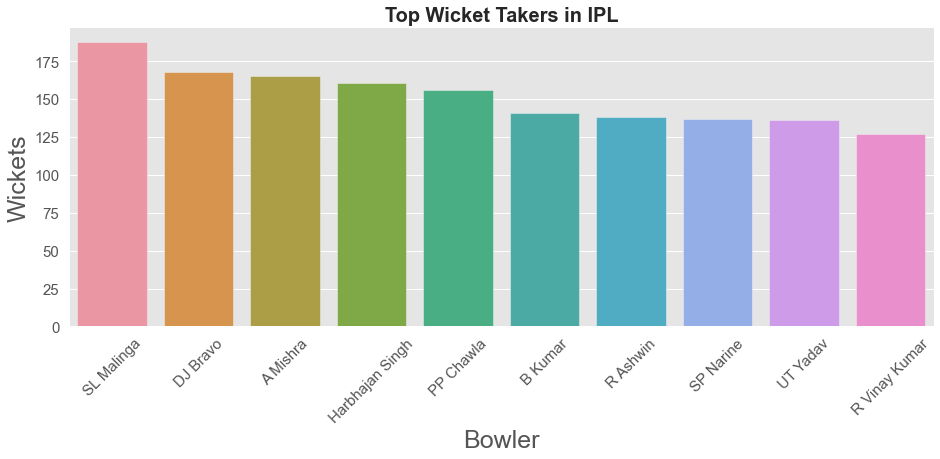

In [48]:
fig=plt.gcf()
fig.set_size_inches(15.5,5.5)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
sns.barplot(top_bowlers_head['bowler'],top_bowlers['wickets'])
plt.title("Top Wicket Takers in IPL", fontsize=20, fontweight = 'bold')
plt.xlabel("Bowler", size = 25)
plt.ylabel("Wickets", size=25)

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/TopWicketTakers'
  plt.savefig(filename, bbox_inches = 'tight')

### Best all-rounders

In [49]:
batsmen = deliveries.groupby('batsman').apply(lambda x:np.sum(x['batsman_runs'])).reset_index(name="runs")
top_batsmen = batsmen.sort_values(by='runs', ascending=False)
top_batsmen=top_batsmen[top_batsmen.runs>=1000]

In [50]:
top_batsmen.rename(columns = {'batsman': 'player'}, inplace = True)
top_batsmen.head()

player  runs
486    V Kohli  5434
428   SK Raina  5415
367  RG Sharma  4914
112  DA Warner  4741
392   S Dhawan  4632

In [51]:
top_bowlers.rename(columns = {'bowler': 'player'}, inplace = True)

In [52]:
all_rounders=pd.merge(top_batsmen, top_bowlers, how='inner')
all_rounders['score']=all_rounders['runs']+25*all_rounders['wickets']
all_rounders = all_rounders.sort_values(by='score', ascending=False)[:5]
all_rounders

player  runs  index  wickets  score
6   SR Watson  3614    107      107   6289
1    SK Raina  5415     30       30   6165
18   DJ Bravo  1498    168      168   5698
0     V Kohli  5434      5        5   5559
2   RG Sharma  4914     16       16   5314

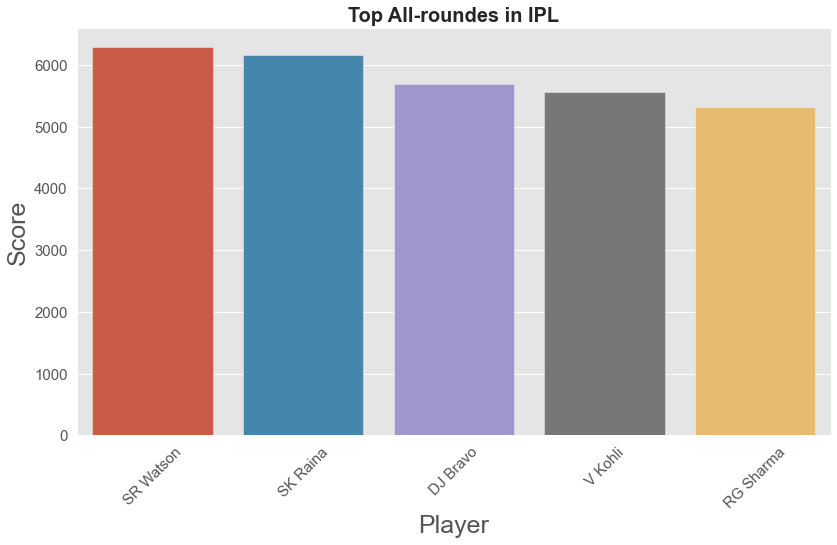

In [53]:
fig=plt.gcf()
fig.set_size_inches(13.5,7.5)
plt.xticks(fontsize=15, rotation=45)
plt.yticks(fontsize=15)
sns.barplot(all_rounders['player'],all_rounders['score'])
plt.title("Top All-roundes in IPL", fontsize=20, fontweight = 'bold')
plt.xlabel("Player", size = 25)
plt.ylabel("Score", size=25)

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/TopAllRounders'
  plt.savefig(filename, bbox_inches = 'tight')

## Death overs analysis

In [54]:
#Adding some more Feature Columns to deliveries Dataset
dic = dict()
for match_id in matches['id'].unique():
    dic[match_id] = matches[matches['id']==match_id]['season'].values[0]
deliveries['season'] = [dic[i] for i in deliveries['match_id']]

In [55]:
# Selecting only the Death Overs i.e. 16-20 overs
deliveries = deliveries[deliveries['over']>=16]
deliveries.shape

(40400, 22)

In [56]:
matches.head(1)

id  season       city        date                team1  \
0   1    2017  Hyderabad  2017-04-05  Sunrisers Hyderabad   

                         team2                  toss_winner toss_decision  \
0  Royal Challengers Bangalore  Royal Challengers Bangalore         field   

   result  dl_applied               winner  win_by_runs  win_by_wickets  \
0  normal           0  Sunrisers Hyderabad           35               0   

  player_of_match                               venue      umpire1   umpire2  \
0    Yuvraj Singh  Rajiv Gandhi Intl. Cricket Stadium  AY Dandekar  NJ Llong   

  umpire3  
0     NaN

In [57]:
deliveries.head(1)

match_id  inning batting_team bowling_team  over  ball       batsman  \
93         1       1          SRH          RCB    16     1  MC Henriques   

     non_striker     bowler  is_super_over  ...  legbye_runs  noball_runs  \
93  Yuvraj Singh  YS Chahal              0  ...            0            0   

    penalty_runs  batsman_runs  extra_runs  total_runs  player_dismissed  \
93             0             0           0           0               NaN   

    dismissal_kind fielder season  
93             NaN     NaN   2017  

[1 rows x 22 columns]

[2669 1562 1450 1412 1154 1134 1073  940  911  887]


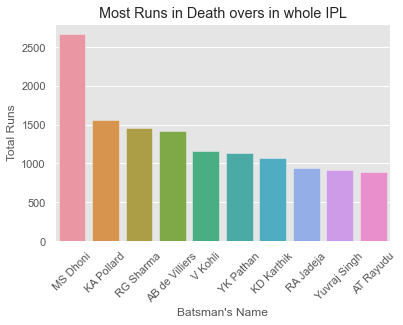

[1686  987  938  917  689  684  591  583  555  554]


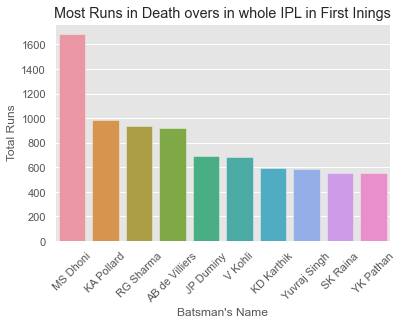

[983 580 575 512 495 482 470 451 416 381]


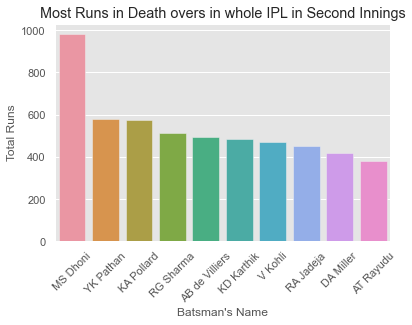

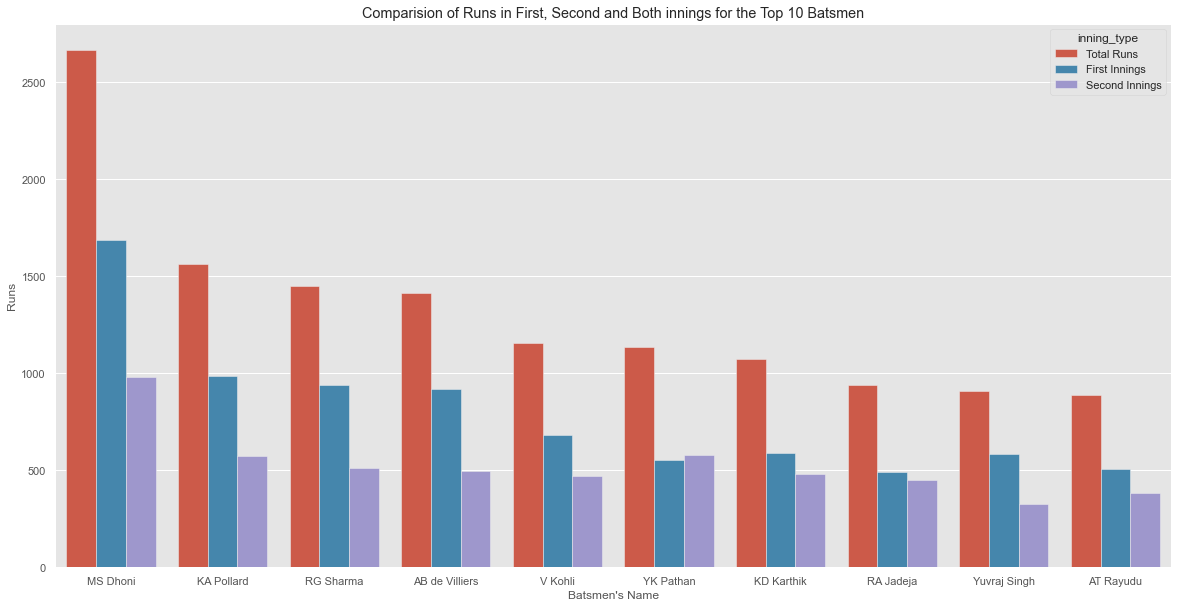

In [58]:
def Task_1_a(deliveries):
    # Batsmen with most runs in death overs in whole IPL.
    df_bats_tot = []
    for bat_name in deliveries['batsman'].unique():
        df_tmp = deliveries[deliveries['batsman']==bat_name]
        df_bats_tot.append([bat_name, df_tmp['batsman_runs'].sum()])

    df_bats_tot = pd.DataFrame(df_bats_tot, columns=['batsman', 'total_runs'])
    df_bat = df_bats_tot.sort_values('total_runs', ascending = False)

    top_10 = df_bat.head(10)
    print(top_10['total_runs'].values)
    fig=plt.gcf()
    ax = sns.barplot(x = top_10['batsman'], y = top_10['total_runs'])
    plt.title('Most Runs in Death overs in whole IPL')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel('Batsman\'s Name')
    ax.set_ylabel('Total Runs')
    plt.show()
    # save file
    if save_files:
      if not os.path.exists('plots'):
        os.makedirs('plots')
      filename = 'plots/most_deathOverRuns_overall'
      fig.savefig(filename, bbox_inches = 'tight')
    return df_bat
    
def Task_1_b(deliveries):
    # Batsmen with most runs in death overs batting first in whole IPL.
    df_bats_tot = []
    for bat_name in deliveries['batsman'].unique():
        df_tmp = deliveries[(deliveries['batsman']==bat_name) & (deliveries['inning']==1)]
        df_bats_tot.append([bat_name, df_tmp['batsman_runs'].sum()])

    df_bats_tot = pd.DataFrame(df_bats_tot, columns=['batsman', 'total_runs'])
    df_bat = df_bats_tot.sort_values('total_runs', ascending = False)

    top_10 = df_bat.head(10)
    print(top_10['total_runs'].values)
    fig=plt.gcf()
    ax = sns.barplot(x = top_10['batsman'], y = top_10['total_runs'])
    plt.title('Most Runs in Death overs in whole IPL in First Inings')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel('Batsman\'s Name')
    ax.set_ylabel('Total Runs')
    plt.show()
    return df_bat
    # save file
    if save_files:
      if not os.path.exists('plots'):
        os.makedirs('plots')
      filename = 'plots/most_deathOverRuns_firstInnings'
      fig.savefig(filename, bbox_inches = 'tight')
    
    
def Task_1_c(deliveries):
    # Batsmen with most runs in death overs batting second in whole IPL.
    df_bats_tot = []
    for bat_name in deliveries['batsman'].unique():
        df_tmp = deliveries[(deliveries['batsman']==bat_name) & (deliveries['inning']==2)]
        df_bats_tot.append([bat_name, df_tmp['batsman_runs'].sum()])

    df_bats_tot = pd.DataFrame(df_bats_tot, columns=['batsman', 'total_runs'])
    df_bat = df_bats_tot.sort_values('total_runs', ascending = False)

    top_10 = df_bat.head(10)
    print(top_10['total_runs'].values)
    fig=plt.gcf()
    ax = sns.barplot(x = top_10['batsman'], y = top_10['total_runs'])
    plt.title('Most Runs in Death overs in whole IPL in Second Innings')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.set_xlabel('Batsman\'s Name')
    ax.set_ylabel('Total Runs')
    plt.show()
    # save file
    if save_files:
      if not os.path.exists('plots'):
        os.makedirs('plots')
      filename = 'plots/most_deathOverRuns_SecondInnings'
      fig.savefig(filename, bbox_inches = 'tight')
    return df_bat
    
df_bat_1 = Task_1_a(deliveries)
df_bat_2 = Task_1_b(deliveries)
df_bat_3 = Task_1_c(deliveries)

# Comparision of Total Runs and runs in First and Second Innings fot the Top 10 batsmen
player_name = df_bat_1['batsman'][:10].values
first_runs = [ df_bat_2[df_bat_2['batsman']==i]['total_runs'].values[0] for i in player_name ]
second_runs = [ df_bat_3[df_bat_3['batsman']==i]['total_runs'].values[0] for i in player_name ]
total_runs = df_bat_1['total_runs'][:10].values
tmp = []
for i in range(len(player_name)):
    tmp.append([player_name[i], total_runs[i], 'Total Runs'])
    tmp.append([player_name[i], first_runs[i], 'First Innings'])
    tmp.append([player_name[i], second_runs[i], 'Second Innings'])
df_bats = pd.DataFrame(tmp, columns = ['batsmen', 'runs', 'inning_type'])
fig, axes = plt.subplots(figsize=(20,10))
ax = sns.barplot(data = df_bats, x='batsmen', y='runs', hue='inning_type', ax=axes)
ax.set_xlabel('Batsmen\'s Name')
ax.set_ylabel('Runs')
plt.title('Comparision of Runs in First, Second and Both innings for the Top 10 Batsmen')
# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/Batsmen_DeathOverComparison_InningWise'
  fig.savefig(filename, bbox_inches = 'tight')

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
['MS Dhoni', 'AB de Villiers', 'KA Pollard', 'MS Dhoni', 'DJ Bravo', 'MS Dhoni', 'MS Dhoni', 'MS Dhoni', 'V Kohli', 'MK Tiwary', 'MS Dhoni', 'AD Russell']
[185, 176, 205, 265, 273, 286, 301, 236, 233, 187, 312, 367]
[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
['MS Dhoni', 'AB de Villiers', 'KA Pollard', 'MS Dhoni', 'DJ Bravo', 'RG Sharma', 'RG Sharma', 'KA Pollard', 'V Kohli', 'MK Tiwary', 'MS Dhoni', 'AD Russell']
[150, 122, 158, 253, 196, 208, 139, 203, 155, 145, 155, 230]
[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]
['Y Venugopal Rao', 'RG Sharma', 'V Kohli', 'LRPL Taylor', 'SPD Smith', 'MS Dhoni', 'MS Dhoni', 'DA Miller', 'KA Pollard', 'HH Pandya', 'MS Dhoni', 'AD Russell']
[76, 84, 101, 73, 101, 148, 172, 87, 107, 90, 157, 137]


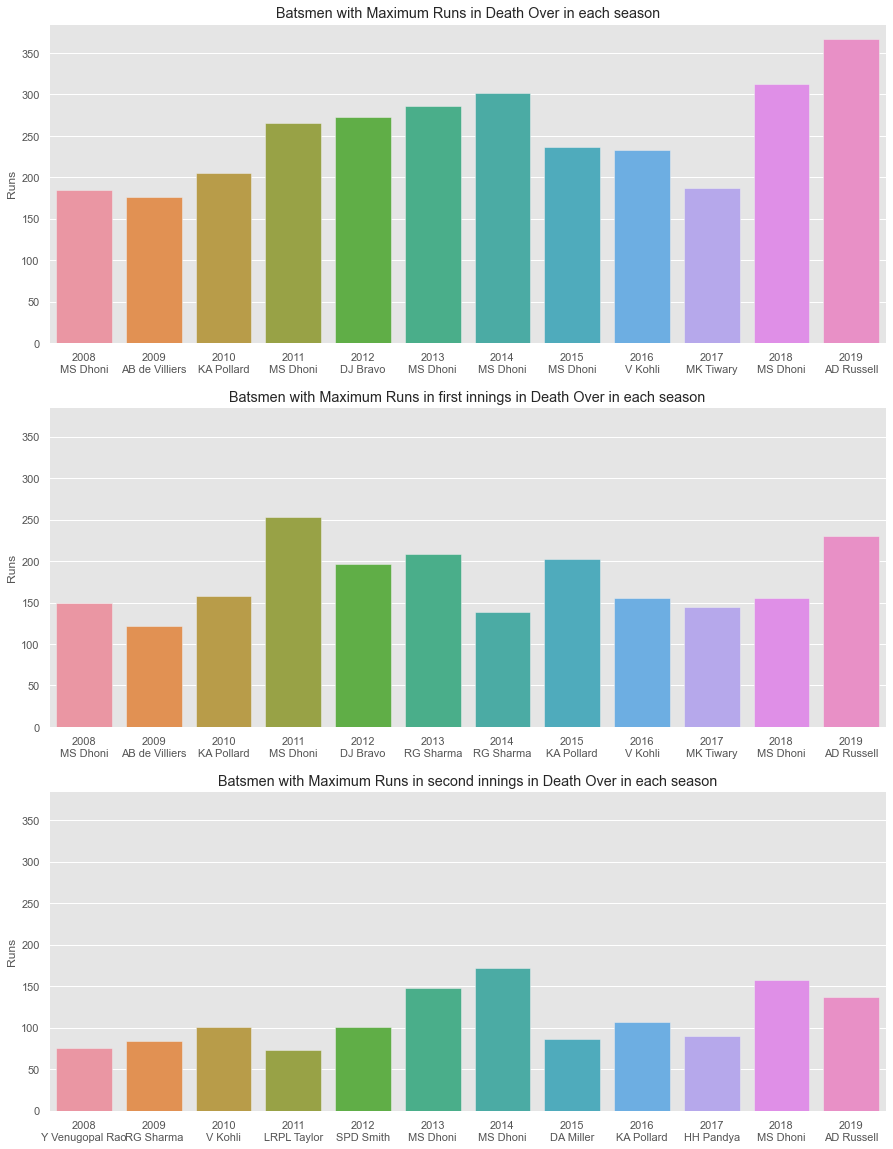

In [59]:
#Task 2

def task_2_a(deliveries, ax):
    # Batsmen with most runs in death overs in each season.
    season = []
    batsmen = []
    runs = []
    for year in sorted(deliveries['season'].unique()):
        df_tmp = deliveries[deliveries['season']==year]
        max_runs = 0
        player_name = None
        for name in df_tmp['batsman'].unique():
            tot_runs = df_tmp[df_tmp['batsman']==name]['batsman_runs'].sum()
            if tot_runs>max_runs:
                max_runs = tot_runs
                player_name = name
        season.append(year)
        batsmen.append(player_name)
        runs.append(max_runs)
    x_tmp = [(str(i)+"\n"+j) for i,j in zip(season,batsmen)]
    print(season)
    print(batsmen)
    print(runs)
    ax.set_title('Batsmen with Maximum Runs in Death Over in each season')
    ax.set_ylabel('Runs')
    sns.barplot(x=x_tmp, y=runs, ax=ax)
    
def task_2_b(deliveries, ax):
    # Batsmen with most runs in death overs batting first in each season.
    deliveries = deliveries[deliveries['inning']==1]
    season = []
    batsmen = []
    runs = []
    for year in sorted(deliveries['season'].unique()):
        df_tmp = deliveries[deliveries['season']==year]
        max_runs = 0
        player_name = None
        for name in df_tmp['batsman'].unique():
            tot_runs = df_tmp[df_tmp['batsman']==name]['batsman_runs'].sum()
            if tot_runs>max_runs:
                max_runs = tot_runs
                player_name = name
        season.append(year)
        batsmen.append(player_name)
        runs.append(max_runs)
    x_tmp = [(str(i)+"\n"+j) for i,j in zip(season,batsmen)]
    print(season)
    print(batsmen)
    print(runs)
    ax.set_title('Batsmen with Maximum Runs in first innings in Death Over in each season')
    ax.set_ylabel('Runs')
    sns.barplot(x=x_tmp, y=runs, ax=ax)
    
def task_2_c(deliveries, ax):
    # Batsmen with most runs in death overs batting second in each season.
    deliveries = deliveries[deliveries['inning']==2]
    season = []
    batsmen = []
    runs = []
    for year in sorted(deliveries['season'].unique()):
        df_tmp = deliveries[deliveries['season']==year]
        max_runs = 0
        player_name = None
        for name in df_tmp['batsman'].unique():
            tot_runs = df_tmp[df_tmp['batsman']==name]['batsman_runs'].sum()
            if tot_runs>max_runs:
                max_runs = tot_runs
                player_name = name
        season.append(year)
        batsmen.append(player_name)
        runs.append(max_runs)
    x_tmp = [(str(i)+"\n"+j) for i,j in zip(season,batsmen)]
    print(season)
    print(batsmen)
    print(runs)
    ax.set_title('Batsmen with Maximum Runs in second innings in Death Over in each season')
    ax.set_ylabel('Runs')
    sns.barplot(x=x_tmp, y=runs, ax=ax)
    
fig, axes = plt.subplots(3,1, figsize=(15,20), sharey=True)
task_2_a(deliveries, axes[0])
task_2_b(deliveries, axes[1])
task_2_c(deliveries, axes[2])

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/mostRuns_in_DeathOvers_eachSeason'
  plt.savefig(filename, bbox_inches = 'tight')

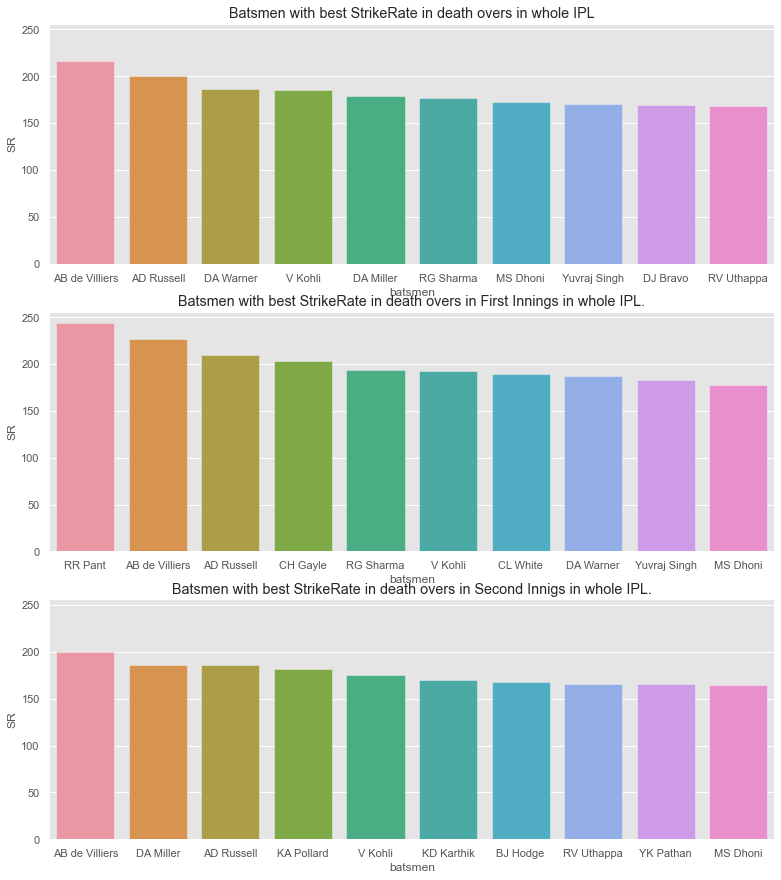

In [60]:
def task_3_a(deliveries, df_bat_1, ax):
    # Batsmen with best StrikeRate in death overs in whole IPL.
    names = df_bat_1[df_bat_1['total_runs']>500]['batsman'].values
    df_tmp = []
    for name in names:
        tot_runs = df_bat_1[df_bat_1['batsman']==name]['total_runs'].values[0]
        tot_balls = deliveries[deliveries['batsman']==name].shape[0]
        df_tmp.append([name, tot_runs/tot_balls*100])
    df_sr = pd.DataFrame(df_tmp, columns=['batsmen', 'SR'])
    df_sr = df_sr.sort_values('SR', ascending=False)
    df_sr = df_sr.head(10)
    sns.barplot(data=df_sr, x='batsmen', y='SR', ax=ax)
    ax.set_title('Batsmen with best StrikeRate in death overs in whole IPL')
    
def task_3_b(df_new, df_bat_1, ax):
    # Batsmen with best StrikeRate in death overs batting first in whole IPL.
    deliveries = df_new[df_new['inning']==1]
    names = df_bat_1[df_bat_1['total_runs']>250]['batsman'].values
    df_tmp = []
    for name in names:
        tot_runs = df_bat_1[df_bat_1['batsman']==name]['total_runs'].values[0]
        tot_balls = deliveries[deliveries['batsman']==name].shape[0]
        df_tmp.append([name, tot_runs/tot_balls*100])
    df_sr = pd.DataFrame(df_tmp, columns=['batsmen', 'SR'])
    df_sr = df_sr.sort_values('SR', ascending=False)
    df_sr = df_sr.head(10)
    sns.barplot(data=df_sr, x='batsmen', y='SR', ax=ax)
    ax.set_title('Batsmen with best StrikeRate in death overs in First Innings in whole IPL.')
    
def task_3_c(df_new, df_bat_1, ax):
    # Batsmen with best StrikeRate in death overs batting second in whole IPL.
    deliveries = df_new[df_new['inning']==2]
    names = df_bat_1[df_bat_1['total_runs']>250]['batsman'].values
    df_tmp = []
    for name in names:
        tot_runs = df_bat_1[df_bat_1['batsman']==name]['total_runs'].values[0]
        tot_balls = deliveries[deliveries['batsman']==name].shape[0]
        df_tmp.append([name, tot_runs/tot_balls*100])
    df_sr = pd.DataFrame(df_tmp, columns=['batsmen', 'SR'])
    df_sr = df_sr.sort_values('SR', ascending=False)
    df_sr = df_sr.head(10)
    sns.barplot(data=df_sr, x='batsmen', y='SR', ax=ax)
    ax.set_title('Batsmen with best StrikeRate in death overs in Second Innigs in whole IPL.')
    
fig,ax = plt.subplots(3, 1, figsize=(13,15), sharey=True)
task_3_a(deliveries, df_bat_1, ax[0])
task_3_b(deliveries, df_bat_2, ax[1])
task_3_c(deliveries, df_bat_3, ax[2])

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/best_deathOver_SR_in_IPL'
  plt.savefig(filename, bbox_inches = 'tight')

30        110      5          31       6         36   \
bowler   SL Malinga  DJ Bravo  B Kumar  SP Narine  A Nehra  UT Yadav   
wickets         108        90       78         57       54        49   

              122        12             94        101  
bowler   DW Steyn  JJ Bumrah  R Vinay Kumar  RP Singh  
wickets        48         47             47        45

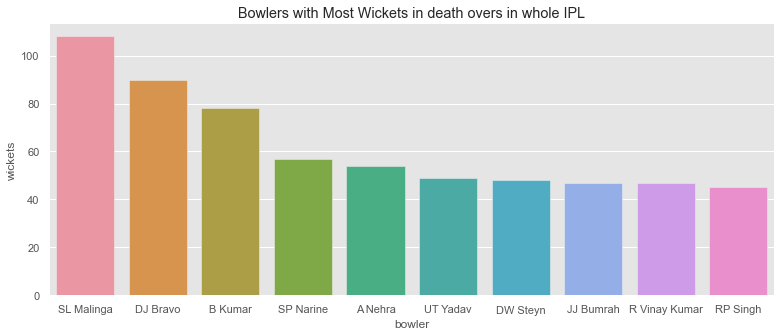

In [61]:
# Bowlers with Most Wickets in death overs in whole IPL.
ways_out = ['obstructing the field', 'retired hurt', 'hit wicket', 'run out']
players = deliveries['bowler'].unique()
df_bowl = []
for name in players:
    df_tmp = deliveries[(deliveries['bowler']==name) & (deliveries['dismissal_kind'].notna())]
    wickets = 0;
    for wic_type in df_tmp['dismissal_kind']:
        if wic_type not in ways_out: wickets += 1
    df_bowl.append([name, wickets])

df_bowl = pd.DataFrame(df_bowl, columns=['bowler', 'wickets'])
df_bowl = df_bowl.sort_values('wickets', ascending=False)
df_bowl.head()

top_10 = df_bowl.head(10)
fig, ax = plt.subplots(figsize=(13,5))
sns.barplot(data=top_10, x='bowler', y='wickets', ax=ax)
ax.set_title('Bowlers with Most Wickets in death overs in whole IPL')

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/most_DeathOverWickets_in_IPL'
  plt.savefig(filename, bbox_inches = 'tight')

top_10.T

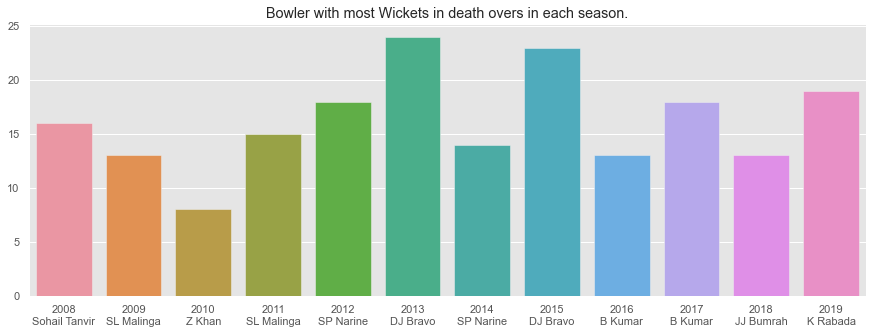

In [62]:
# Bowler with most Wickets in death overs in each season.

season = range(2008, 2019+1)
bowlers = []
wickets = []
for year in season:
    df_tmp = deliveries[deliveries['season']==year]
    bowl_name = None
    max_wickets = 0
    for name in df_tmp['bowler'].unique():
        df_new = df_tmp[(deliveries['bowler']==name) & (deliveries['dismissal_kind'].notna())]
        wicket = 0
        for wick in df_new['dismissal_kind']:
            if wick not in ways_out: wicket += 1
        if wicket>max_wickets:
            max_wickets = wicket
            bowl_name = name
    bowlers.append(bowl_name)
    wickets.append(max_wickets)
x_tmp = [str(i)+'\n'+j for i,j in zip(season, bowlers)]
fig, ax = plt.subplots(figsize=(15,5))
sns.barplot(x = x_tmp, y = wickets, ax=ax)
ax.set_title('Bowler with most Wickets in death overs in each season.')

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/wickets_in_DeathOvers_eachSeason'
  plt.savefig(filename, bbox_inches = 'tight')

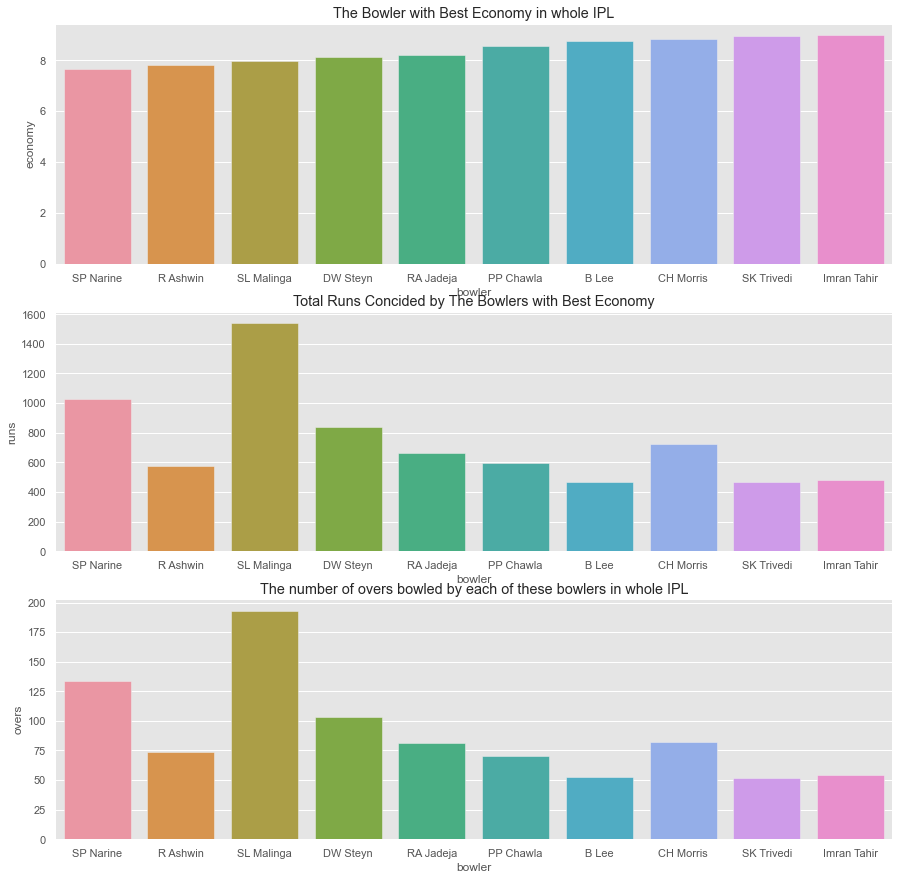

In [63]:
# Bowlers with Best Economy in death overs in whole IPL.

tmp = []
for name in deliveries['bowler'].unique():
    df_tmp = deliveries[deliveries['bowler']==name]
    df_tmp['new'] = [str(i)+'_'+str(j) for i,j in zip(df_tmp['match_id'], df_tmp['over'])]
    num_of_overs = df_tmp[df_tmp['bowler']==name]['new'].unique().shape[0]
    tot_runs = df_tmp['total_runs'].sum() #- df_tmp['bye_runs'].sum() - df_tmp['legbye_runs'].sum()
    economy = tot_runs/num_of_overs
    if num_of_overs<50: continue
    tmp.append([name, num_of_overs, tot_runs, economy])
df_bowl = pd.DataFrame(tmp, columns=['bowler', 'overs', 'runs', 'economy'])
df_bowl = df_bowl.sort_values('economy')
top_10 = df_bowl.head(10)
fig, ax = plt.subplots(3, 1, figsize = (15, 15))
sns.barplot(data=top_10, x='bowler', y='economy', ax=ax[0])
ax[0].set_title('The Bowler with Best Economy in whole IPL')
sns.barplot(data=top_10, x='bowler', y='runs', ax=ax[1])
ax[1].set_title('Total Runs Concided by The Bowlers with Best Economy')
sns.barplot(data=top_10, x='bowler', y='overs', ax=ax[2])
ax[2].set_title('The number of overs bowled by each of these bowlers in whole IPL')

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/economy_in_DeathOvers'
  plt.savefig(filename, bbox_inches = 'tight')

# Factors contributing to wins

## Venue analysis

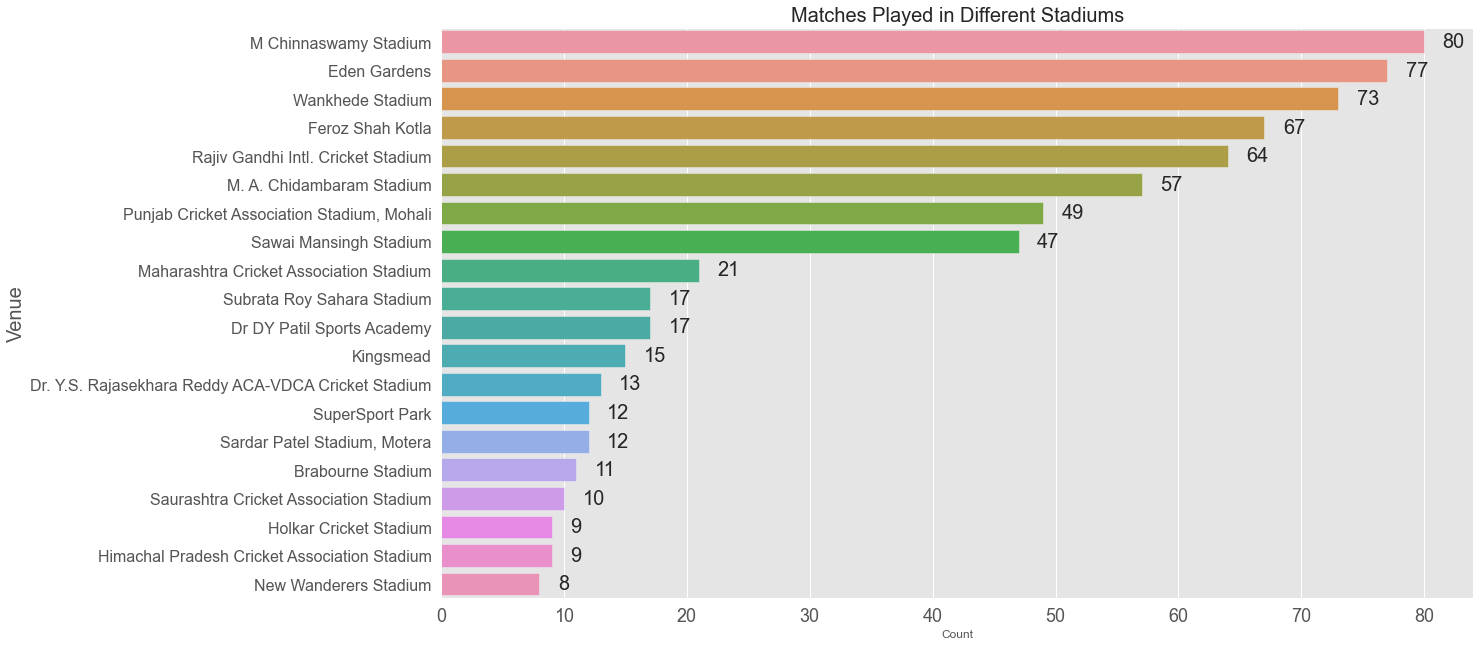

In [64]:
mom = pd.DataFrame()
mom['Count']=matches['venue'].value_counts()
mom['Venue'] =mom.index
mom=mom[:20]
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.ylabel("Venue", size=20)
plt.xticks(fontsize=18)
plt.yticks(fontsize=16)
plt.title("Matches Played in Different Stadiums",fontsize=20)
ax=sns.barplot(x='Count', y='Venue', data=mom)
count=0

for i, v in enumerate(mom['Count']):
    ax.text(v + 1.5, i, str(v),va="center", fontdict=dict(fontsize=20))

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/matches_In_Diff_Stadiums'
  plt.savefig(filename, bbox_inches = 'tight')

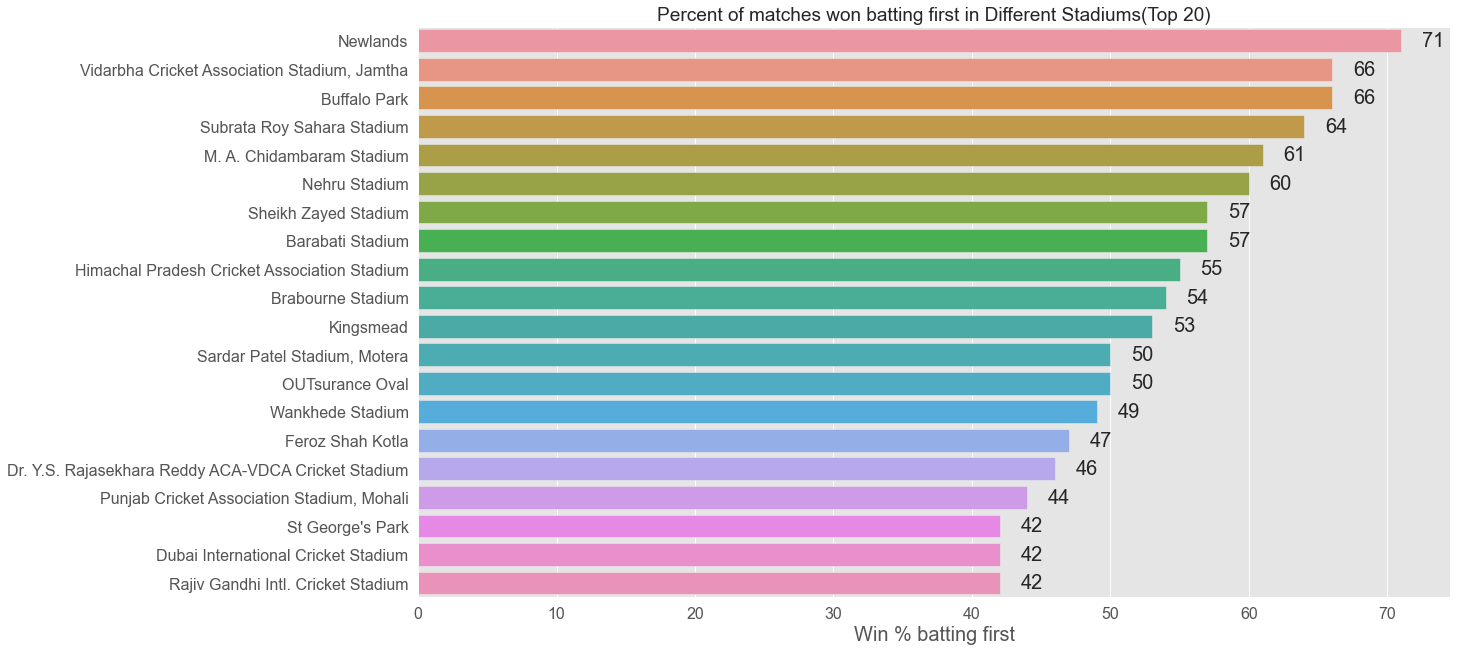

In [65]:
df = pd.DataFrame()
df1 = pd.DataFrame()
chunks = []
chunks.append(matches['toss_winner'][matches['toss_decision']=='bat'])
chunks.append(matches['team2'][(matches['toss_decision']=='field') & (matches['toss_winner'] == matches['team1'])])
chunks.append(matches['team1'][(matches['toss_decision']=='field') & (matches['toss_winner'] == matches['team2'])])

df = pd.DataFrame(pd.concat(chunks))
df = df.sort_index()
df.columns = ['team']

indexes = df[(df['team'] == matches['winner'])&(df.index == matches.index)].index

df1['venue'] = matches['venue'].value_counts()
df1['win_count'] = matches[matches.index.isin(indexes)]['venue'].value_counts()
df1['win %'] = 100 * df1['win_count']/df1['venue'] 
df1 = df1.sort_values(by = ['win %'],ascending = False)
df1 = df1[:20]
winPercent = df1['win %'].astype('int')
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Percent of matches won batting first in Different Stadiums(Top 20)",fontsize=19)
ax=sns.barplot(winPercent[:20], df1[:20].index)
plt.xlabel("Win % batting first", size=20)
count=0

for i, v in enumerate(winPercent):
    ax.text(v + 1.5, i, str(v),va="center", fontdict=dict(fontsize=20))

# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/percent_BatFirstWin_StadiumWise'
  plt.savefig(filename, bbox_inches = 'tight')

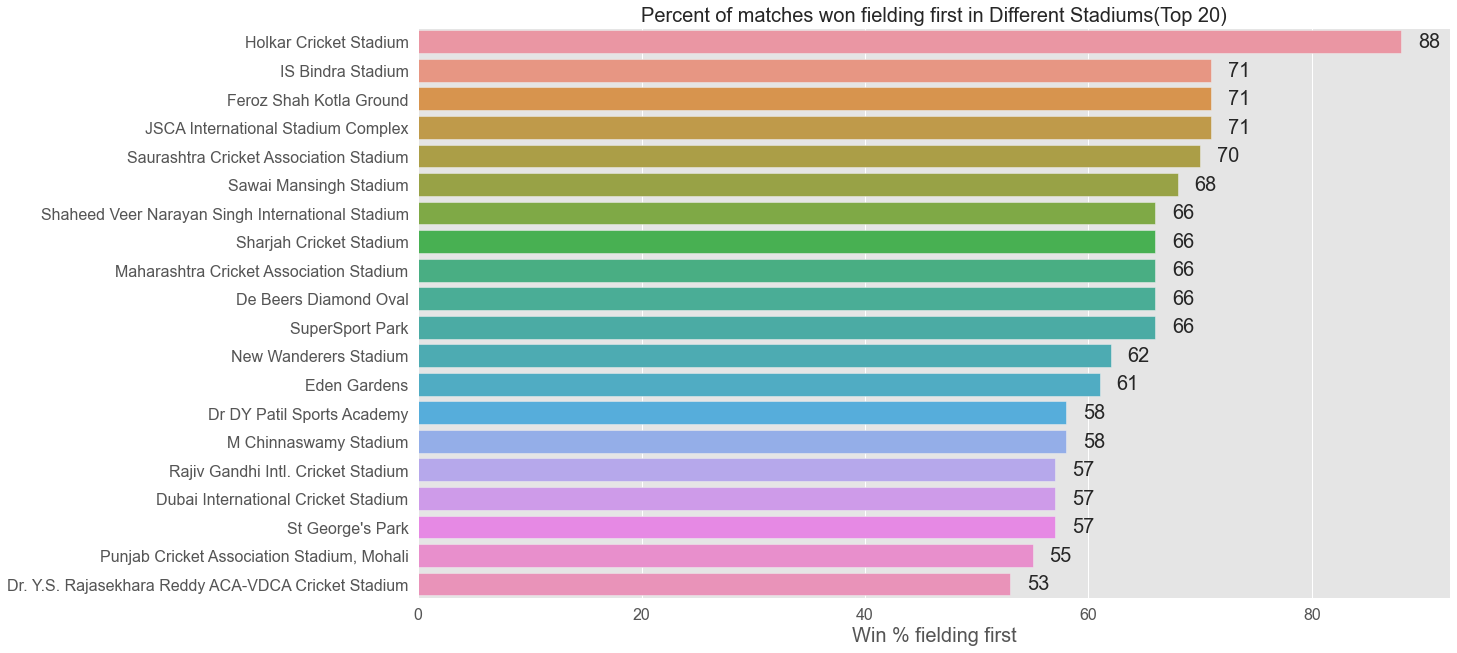

In [66]:
df1 = pd.DataFrame()
 
df1['venue'] = matches['venue'].value_counts()
df1['win_count'] = matches[matches.index.isin(indexes)]['venue'].value_counts()
df1['win %'] = 100 * df1['win_count']/df1['venue'] 
df1 = df1.sort_values(by = ['win %'])
df1['win % balling first'] = 100 - df1['win %']
df1 = df1[:20]
df1['win % balling first'] = df1['win % balling first'].astype('int')
plt.style.use('ggplot')
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title("Percent of matches won fielding first in Different Stadiums(Top 20)",fontsize=20)
ax=sns.barplot(df1['win % balling first'],df1.index)
plt.xlabel("Win % fielding first", size=20)
count=0

for i, v in enumerate(df1['win % balling first']):
    ax.text(v + 1.5, i, str(v),va="center", fontdict=dict(fontsize=20))


# save file
if save_files:
  if not os.path.exists('plots'):
    os.makedirs('plots')
  filename = 'plots/percent_FieldFirstWin_StadiumWise'
  plt.savefig(filename, bbox_inches = 'tight')

# 

## Toss analysis

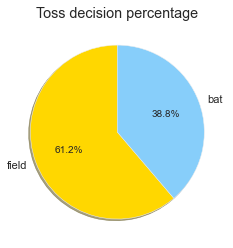

In [71]:
temp_series = matches.toss_decision.value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Toss decision percentage")
plt.show()

Almost 61% of the toss decisions are made to field first. Now let us see how this decision varied over time.

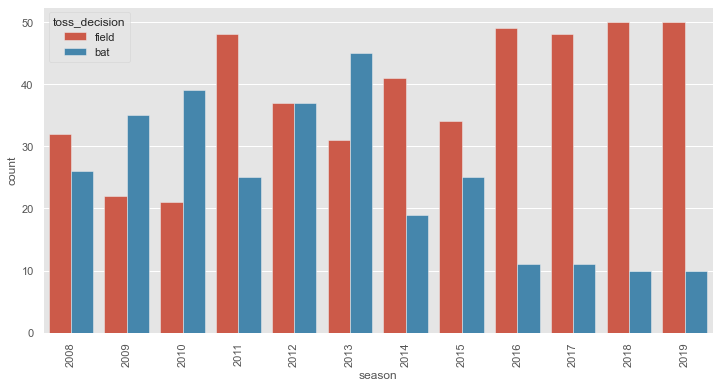

In [73]:
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='toss_decision', data=matches)
plt.xticks(rotation='vertical')
plt.show()

Since there is a very strong trend towards batting second let us see the win percentage of teams batting second.

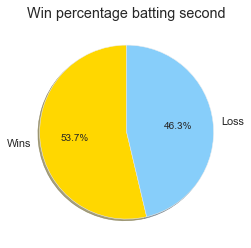

In [75]:
num_of_wins = (matches.win_by_wickets>0).sum()
num_of_loss = (matches.win_by_wickets==0).sum()
labels = ["Wins", "Loss"]
total = float(num_of_wins + num_of_loss)
sizes = [(num_of_wins/total)*100, (num_of_loss/total)*100]
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Win percentage batting second")
plt.show()

So percentage of times teams batting second has won is 53.7. Now let us split this by year and see the distribution.

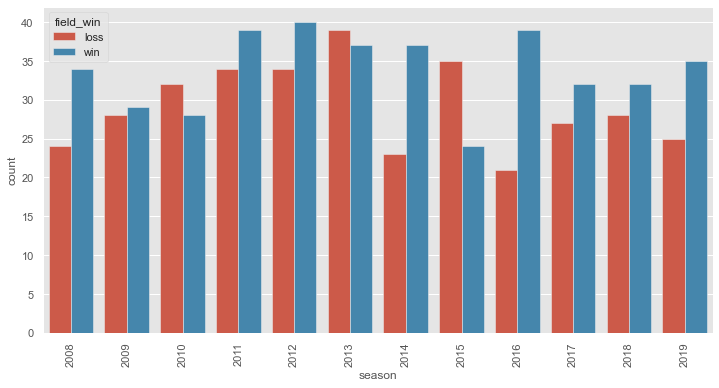

In [76]:
matches["field_win"] = "win"
matches["field_win"].iloc[matches['win_by_wickets']==0] = "loss"
plt.figure(figsize=(12,6))
sns.countplot(x='season', hue='field_win', data=matches)
plt.xticks(rotation='vertical')
plt.show()

Number of wins batting second is also quite high.

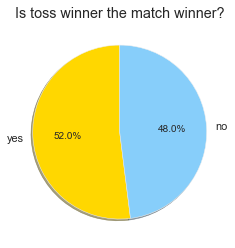

In [79]:
matches['toss_winner_is_winner'] = 'no'
matches['toss_winner_is_winner'].iloc[matches.toss_winner == matches.winner] = 'yes'
temp_series = matches.toss_winner_is_winner.value_counts()

labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))
colors = ['gold', 'lightskyblue']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.title("Is toss winner the match winner?")
plt.show()

Seems like it is not really the case. Win chances are almost equal irrespective of the toss outcome.
Let's also look at the team wise break up. If the team wins the toss, will it end up in the winning side?

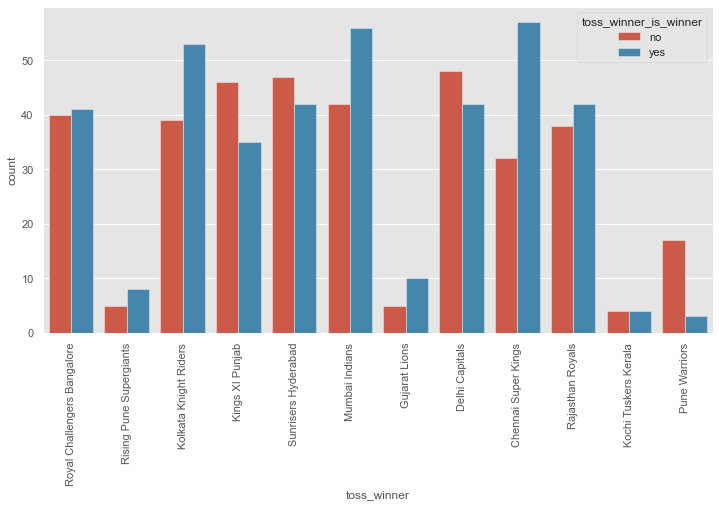

In [78]:
plt.figure(figsize=(12,6))
sns.countplot(x='toss_winner', hue='toss_winner_is_winner', data=matches)
plt.xticks(rotation='vertical')
plt.show()

For Chennai Super Kings (CSK), it seems winning the toss is an indication of winning the match with high probability.
On the other hand, Pune Warriors ended up losing the matches more often when they won the toss.